For reference, see the [Pandas website](http://pandas.pydata.org/) and the book *'Python for Data Analysis'* by Wes McKinney.

In [1]:
import pandas as pd

__*Question:*__ Given a dataframe with
+ rows of genes
+ columns of molecules
+ values of gene-molecule interaction

How can I find pairs of columns and rows that pass a certain filter condition?

In [2]:
def get_gene_df():
    "get gene dataframe"
    df = pd.DataFrame([[1.1, 2.3, 3.4], 
                       [1.9, 2.8, 2.1], 
                       [2.9, 3.4, 5.7], 
                       [3.6, 1.9, 2.1]
                      ])
    df.columns = ['molA', 'molB', 'molC']
    df.index = ['gene1', 'gene2', 'gene3', 'gene4']
    return df

In [3]:
def filter_picture(df, expr):
    """ create dataframe picture from filter expression
        example expr: lambda x: x>3
    """
    df2 = df.copy()
    for col in df2.columns:
        df2[col] = df2[col].apply(lambda y: 'o' if expr(y) else '')
    return df2

In [4]:
def filter_row_column(df, expr):
    """ filter dataframe df using expression expr
        example expr: lambda x: x>3
        return columns and rows that satisfy expression
    """
    out = []
    for col in df.columns:
        ser = df[col]               # series is dataframe column
        ser = ser[ser.apply(expr)]  # filter series by expr
        for row in ser.index:
            out.append((col, row))    # append (column, row) tuple
    return out

In [5]:
df = get_gene_df()
print('df input:\n%s' % df)

df input:
       molA  molB  molC
gene1   1.1   2.3   3.4
gene2   1.9   2.8   2.1
gene3   2.9   3.4   5.7
gene4   3.6   1.9   2.1


In [6]:
df2 = filter_picture(df, lambda x: x>3)
print('\ndataframe, genes > 3:\n%s' % df2)
out = filter_row_column(df, lambda x: x>3)
print('\nfilter output: %s' % out)


dataframe, genes > 3:
      molA molB molC
gene1              o
gene2               
gene3         o    o
gene4    o          

filter output: [('molA', 'gene4'), ('molB', 'gene3'), ('molC', 'gene1'), ('molC', 'gene3')]


In [7]:
df2 = filter_picture(df, lambda x: x>2.2)
print('\ndataframe, genes > 2.2:\n%s' % df2)
out = filter_row_column(df, lambda x: x>2.2)
print('\nfilter output: %s' % out)


dataframe, genes > 2.2:
      molA molB molC
gene1         o    o
gene2         o     
gene3    o    o    o
gene4    o          

filter output: [('molA', 'gene3'), ('molA', 'gene4'), ('molB', 'gene1'), ('molB', 'gene2'), ('molB', 'gene3'), ('molC', 'gene1'), ('molC', 'gene3')]


In [8]:
import seaborn as sns
%matplotlib inline

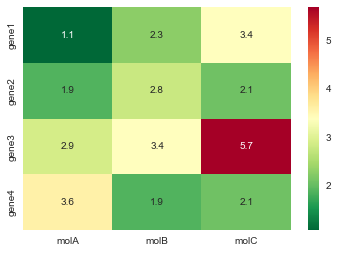

In [9]:
# plot seaborn heatmap 
sns.heatmap(df, cmap='RdYlGn_r', annot=True)